# Model Evaluation Tutorial <a class="anchor" id="tut-home-anchor"></a>
* [Binary Evaluation](#tut-bin-anchor)
* [Multilabel Evaluation](#tut-multi-anchor)


## Binary Evaluation <a class="anchor" id="tut-bin-anchor"></a>
* [Performance Metrics](#tut-binper-anchor)
* [Confusion Matrix](#tut-bincon-anchor)
* [ROC Curve](#tut-binroc-anchor)

[home](#tut-home-anchor)

Importing dependencies.

In [ ]:
import numpy  as np
import pandas as pd
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets        import load_breast_cancer
print('---Libraries Imported!---')

For simplicity purposes, a dataset of breast cancer patients will be used, the dataset is binary.

In [2]:
data = load_breast_cancer()
X    = data['data']
y    = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

A model is created, in general, any model for binary classification can be used.

In [3]:
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/anaconda3/envs/exp_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Once the model is fitted, the test set and the predicted labels can be used for evaluation.

In [4]:
clf_pred      = model.predict(X_test)
probabilities = model.predict_proba(X_test)

Initiate the **Binary Evaluation** class. The class should be given a single arguement which is the true labels of the test set.

In [5]:
from utils.evaluation import BinaryEvaluation

bin_eval = BinaryEvaluation(y_test)

Parent class with reusable, static functions.


### Performance Metrics <a class="anchor" id="tut-binper-anchor"></a> 
[home](#tut-bin-anchor)

In order to observe the performance metrics of the model, we call the following method:

In [6]:
bin_eval.evaluation_score(clf_pred, probabilities, ['No Cancer','Cancer'])

   Cohen's Kappa: 0.94
         Accuracy: 0.97
Balanced Accuracy: 0.97
               F1: 0.98
            AUROC: 1.0
     Subset accuracy: 0.972
            0/1 Loss: 0.028
        Hamming Loss: 0.028
              precision    recall  f1-score   support

   No Cancer       0.98      0.94      0.96        54
      Cancer       0.97      0.99      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Note that not every model has the option to yield probabilities, this is why the second arguement (<u>probabilities</u>) is optional. The third arguement (<u>labels</u>) is optional, too. If given, it will change the class names in the classification report.

### Confusion Matrix<a class="anchor" id="tut-bincon-anchor"></a>
[home](#tut-bin-anchor)

In order to observe the confusion matrix, we call the following method:

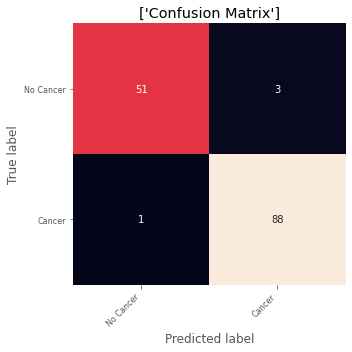

In [7]:
bin_eval.visualize_conf_matrix(clf_pred,['Confusion Matrix'],['No Cancer', 'Cancer'])

Note that the second arguement (<u>labels</u>) is optionl. If given, the confusion matrix will have a title, this is done in order to follow the pattern of the multilabel class. The third arguement (<u>targets</u>) is optional, too. If given, it will change 0/1 with particular names. 

### ROC Curve<a class="anchor" id="tut-binroc-anchor"></a>
[home](#tut-bin-anchor)

In order to observe the ROC Curve, we call the following method:

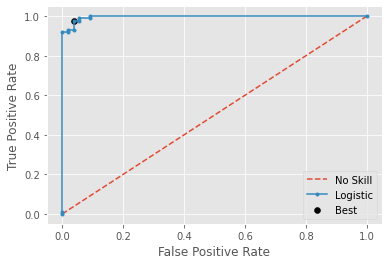

In [8]:
bin_eval.visualize_rocs(probabilities)

Note that the **ROC Curve** can be called only if the model can yield probabilities.

## Multilabel Evaluation <a class="anchor" id="tut-multi-anchor"></a>
* [Performance Metrics](#tut-multiper-anchor)
* [Confusion Matrix](#tut-multicon-anchor)
* [ROC Curve](#tut-multiroc-anchor)

[home](#tut-home-anchor)

A dataset of multilabel texts will be used.

In [9]:
data_multi = pd.read_excel('/storage/ADP/georgi.angelchev/data/multilabel_annotatedData.xlsx')
X_train, X_test, y_train, y_test = train_test_split(data_multi['body'], data_multi['labels'], test_size=0.15, random_state=42)

Converting the string labels into a matrix format so that they can be passed to a model.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

def split_labels(labels, splitter=';'):
    
    labels = labels.split(splitter)
    labels = [label.strip() for label in labels] 
    
    return labels

count_vectorizer  = CountVectorizer(tokenizer=split_labels).fit(y_train)
y_train_multilabel = count_vectorizer.transform(y_train)
y_test_multilabel = count_vectorizer.transform(y_test)

labels = count_vectorizer.get_feature_names()

/opt/anaconda3/envs/exp_env/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Converting the texts into a matrix format.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=0.00009, smooth_idf=True,
                                   norm="l2", tokenizer=lambda x: x.split(" "),
                                   sublinear_tf=False, ngram_range=(1,1))
X_train_multilabel = tfidf_vectorizer.fit_transform(X_train)
X_test_multilabel  = tfidf_vectorizer.transform(X_test)

A model is created which yield the predicted labels, the y_score and the probabilities.

In [12]:
from sklearn.multiclass   import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf = OneVsRestClassifier(LogisticRegression(class_weight='balanced'), n_jobs=-1)
clf.fit(X_train_multilabel, y_train_multilabel)

clf_pred      = clf.predict(X_test_multilabel)
y_score       = clf.fit(X_train_multilabel, y_train_multilabel).decision_function(X_test_multilabel)
probabilities = clf.predict_proba(X_test_multilabel)

Initiate the **Multilabel Evaluation** class. The class takes a single arguement which is the true labels of the test set.

In [13]:
from utils.evaluation import MultilabelEvaluation

multi_eval = MultilabelEvaluation(y_test_multilabel)

Parent class with reusable, static functions.


### Performance Metrics<a class="anchor" id="tut-multiper-anchor"></a>
[home](#tut-multi-anchor)

In order to observe the performance metrics of the model, we call the following method:

In [14]:
multi_eval.evaluation_score(clf_pred, y_score, probabilities, labels)

  Jaccard similarity: 0.594
           Precision: 0.654
              Recall: 0.83
                  F1: 0.696

          Ranking metrics
           One-Error: 0.934


/opt/anaconda3/envs/exp_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


            Coverage: 3.136
        Ranking Loss: 0.029
   Average Precision: 0.86

LABEL-BASED measures

     Classification metrics
      Label Accuracy: 0.956
           Precision: 0.598
              Recall: 0.8
                  F1: 0.684

          Ranking metrics
  micro-averaged AUC: 0.971
w. Average Precision: 0.769
     Subset accuracy: 0.28
            0/1 Loss: 0.72
        Hamming Loss: 0.044
                                               precision    recall  f1-score   support

                              art and culture       0.65      0.86      0.74       229
                business and industry – other       0.00      0.00      0.00         7
                                   capacities       0.62      0.81      0.71       211
                   contracts and partnerships       0.64      0.78      0.70       199
        corporate actions, plans and strategy       0.47      0.75      0.58       216
                corporate finance and results       0.60      0.88  

/opt/anaconda3/envs/exp_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/exp_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Note that <u>y_score</u> is an optional arguement since not all model has an option for decision function. The third arguement (<u>probabilities</u>) is also optional for the same reason. If you don't set the parameter <u>labels</u>, the rows in the classification report won't have names, they will be enumerated.

### Confusion Matrix<a class="anchor" id="tut-multicon-anchor"></a>
[home](#tut-multi-anchor)

In order to observe the confusion matrix, we call the following method:

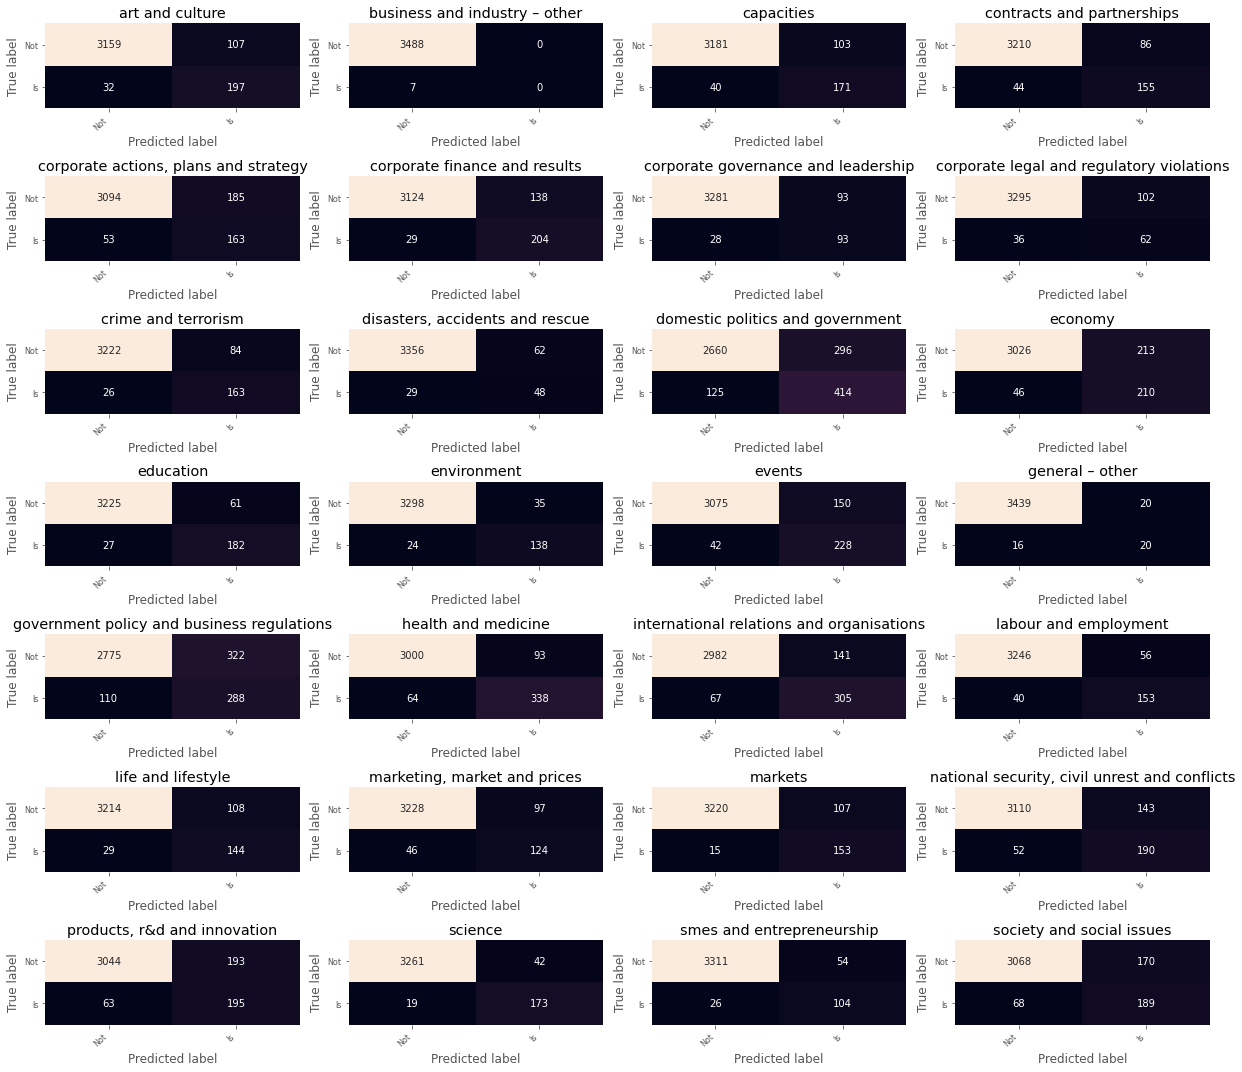

In [15]:
multi_eval.visualize_conf_matrix(clf_pred, labels, ['Not','Is'])

Note that the arguement <u>labels</u> is optional. If given, it specifies which class each confusion matrix represents. The third arguement (<u>targets</u>) is also optional. If given, it changes the labels from 0/1 to some particular names.

### ROC Curve<a class="anchor" id="tut-multiroc-anchor"></a>
[home](#tut-multi-anchor)

In order to observe the ROC Curve, we call the following method:

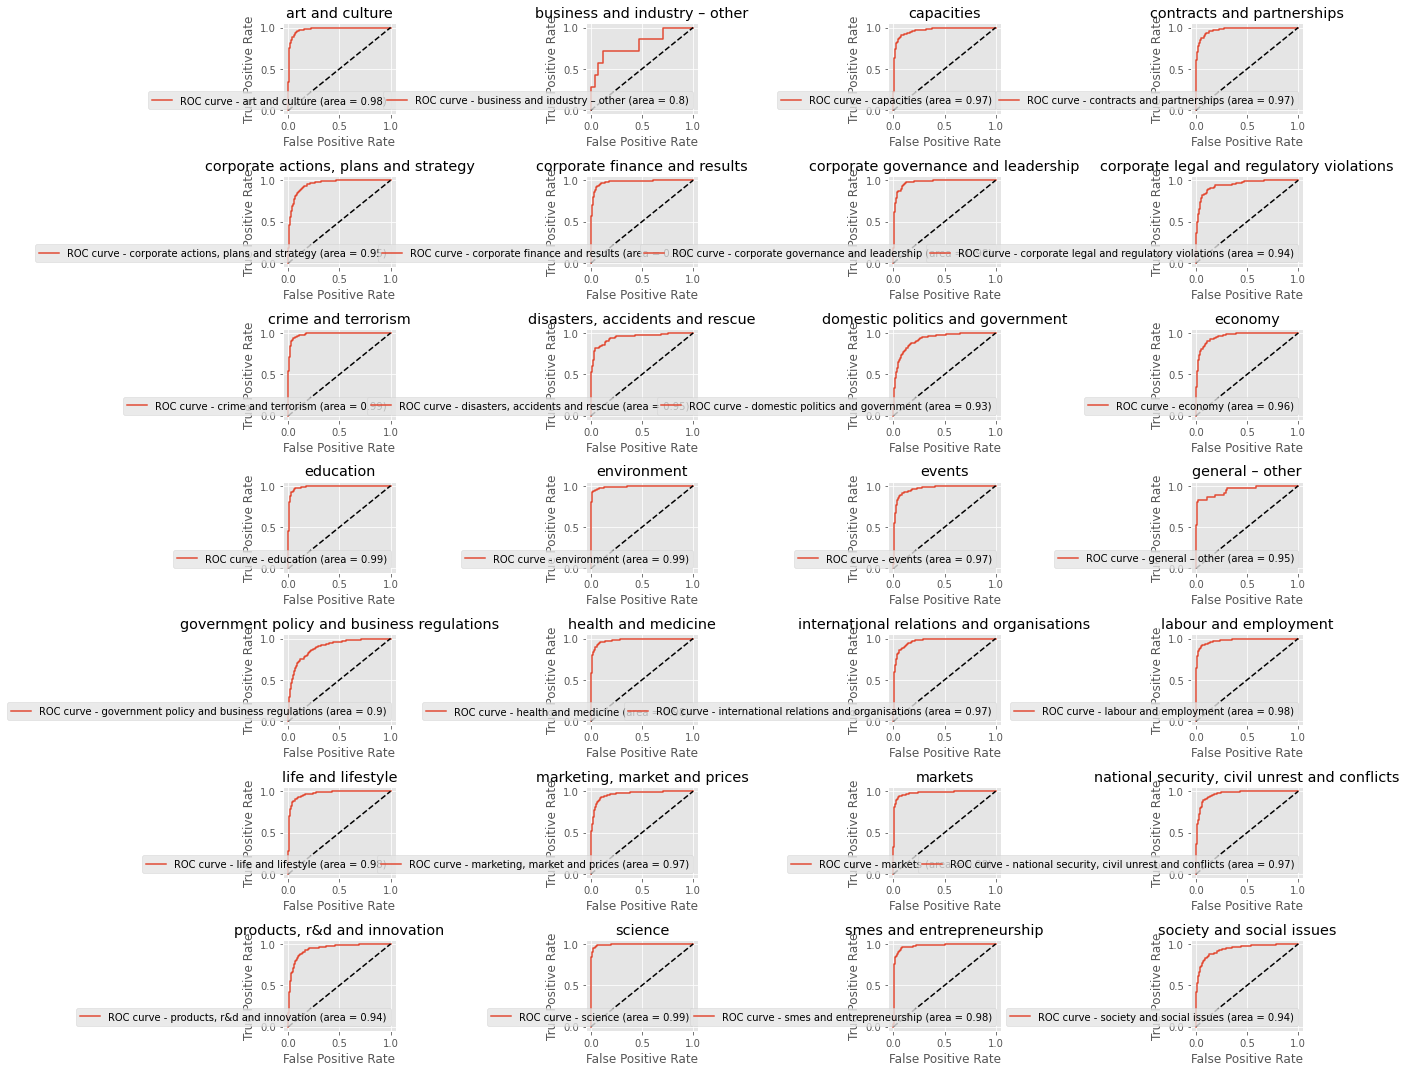

In [16]:
multi_eval.visualize_rocs(y_score, labels)

Note that the method doesn't take any optional arguements, so if the labels are not known or the y_score can be obtained from the model, you <u>cannot</u> call this method.